In [1]:
import pandas as pd
import numpy as np

import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import text_to_word_sequence

from sklearn import metrics
from sklearn import model_selection

import time

# Naive Bayes Classification 

In [2]:
TEXT_COL = 'comment_text'
LABEL_COL = 'target'


In [3]:
# helper function to read the dataset and split data into train and validation sets
def read_data(file_path):
    print("read the data")
    start = time.time()

    data = pd.read_csv(file_path)

    # convert commnets to string data type
    data[TEXT_COL] = data[TEXT_COL].astype(str)

    # label the data i.e. all comments with toxicity score more or equal to 0.5 are toxic (positive class)
    data = data.loc[:, [TEXT_COL, LABEL_COL]]
    data[LABEL_COL] = np.where(data[LABEL_COL] >= 0.5, True, False)

    # split dataset into 80% train set and 20% validation set
    train_data, validate_data = model_selection.train_test_split(data, test_size=0.2)
    print('%d train set comments, %d validation set comments' % (len(train_data), len(validate_data)))

    print("- %s seconds " % int(time.time() - start))
    return train_data, validate_data


In [4]:
# read in the data
train_data, validate_data = read_data('D:/NEU/Fall 2020/NLP/Project/train.csv')

read the data
1443899 train set comments, 360975 validation set comments
- 10 seconds 


**train set has 1.4 million comments and validation set has 360000 comments**

In [5]:
train_data.head()

,comment_text,target
342602,"Solution, we as True Canasians stand together\...",True
965526,And how is it that a**holes like him have any ...,True
81282,You might want to listen to the speech on line...,True
1802099,I'm not judging another women's life choice. I...,False
130746,"""No one really knows because no one understand...",False


In [6]:
validate_data.head()

,comment_text,target
143632,"Fuck fluoridation, that shit is toxic. Fuck it...",True
591354,"Try reading the article: ""The refugee claiman...",False
434261,So many people have proudly elevated themselve...,True
1438345,"Mr. Eyman, it's a small mind that can't get on...",True
1121809,Only more dangerous to criminals in a stolen v...,False


In [7]:
# helper function remove punctuation

import string

def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    return text



In [8]:
# helper function to tokenize comments

#tokenize the tweets
import re
def tokenization(text):
    text = re.split('\W+', text)
    return text

In [9]:
# helper function to remove stop words

import nltk
from nltk.corpus import stopwords

stopword = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

In [10]:
# remove punctuation, tokenize and remove stop words from comments in train set
train_data['nopunc'] = train_data['comment_text'].apply(lambda x: remove_punct(x))
train_data['tokenized'] = train_data['nopunc'].apply(lambda x: tokenization(x.lower()))
train_data['nostop'] = train_data['tokenized'].apply(lambda x: remove_stopwords(x))


In [11]:
# remove punctuation, tokenize and remove stop words from comments in validation set
validate_data['nopunc'] = validate_data['comment_text'].apply(lambda x: remove_punct(x))
validate_data['tokenized'] = validate_data['nopunc'].apply(lambda x: tokenization(x.lower()))
validate_data['nostop'] = validate_data['tokenized'].apply(lambda x: remove_stopwords(x))


In [12]:
train_data.head()

,comment_text,target,nopunc,tokenized,nostop
342602,"Solution, we as True Canasians stand together\...",True,Solution we as True Canasians stand together\n...,"[solution, we, as, true, canasians, stand, tog...","[solution, true, canasians, stand, together, r..."
965526,And how is it that a**holes like him have any ...,True,And how is it that aholes like him have any bu...,"[and, how, is, it, that, aholes, like, him, ha...","[aholes, like, business, right, carry, gun, an..."
81282,You might want to listen to the speech on line...,True,You might want to listen to the speech on line...,"[you, might, want, to, listen, to, the, speech...","[might, want, listen, speech, line, hillary, c..."
1802099,I'm not judging another women's life choice. I...,False,Im not judging another womens life choice Im j...,"[im, not, judging, another, womens, life, choi...","[im, judging, another, womens, life, choice, i..."
130746,"""No one really knows because no one understand...",False,No one really knows because no one understands...,"[no, one, really, knows, because, no, one, und...","[one, really, knows, one, understands, got, fi..."


In [13]:
validate_data.head()

,comment_text,target,nopunc,tokenized,nostop
143632,"Fuck fluoridation, that shit is toxic. Fuck it...",True,Fuck fluoridation that shit is toxic Fuck it f...,"[fuck, fluoridation, that, shit, is, toxic, fu...","[fuck, fluoridation, shit, toxic, fuck, fuck, ..."
591354,"Try reading the article: ""The refugee claiman...",False,Try reading the article The refugee claimants...,"[try, reading, the, article, the, refugee, cla...","[try, reading, article, refugee, claimants, ar..."
434261,So many people have proudly elevated themselve...,True,So many people have proudly elevated themselve...,"[so, many, people, have, proudly, elevated, th...","[many, people, proudly, elevated, willfully, e..."
1438345,"Mr. Eyman, it's a small mind that can't get on...",True,Mr Eyman its a small mind that cant get ones p...,"[mr, eyman, its, a, small, mind, that, cant, g...","[mr, eyman, small, mind, cant, get, ones, poin..."
1121809,Only more dangerous to criminals in a stolen v...,False,Only more dangerous to criminals in a stolen v...,"[only, more, dangerous, to, criminals, in, a, ...","[dangerous, criminals, stolen, vehicle, middle..."


In [14]:
traintext = train_data['nostop'].tolist()
validatetext = validate_data['nostop'].tolist()
print(len(traintext))
print(len(validatetext))

1443899
360975


In [15]:
nostop_train = []
for i in range(len(traintext)):
    nostop_train.append(" ".join(traintext[i]))
    

In [16]:
nostop_validate = []
for i in range(len(validatetext)):
    nostop_validate.append(" ".join(validatetext[i]))
    

In [17]:
print(len(nostop_train))
print(len(nostop_validate))

1443899
360975


In [18]:
# append the above 2 lists to their respective dfs
del train_data['comment_text']
del validate_data['comment_text']

train_data['comment_text'] = nostop_train
validate_data['comment_text'] = nostop_validate


In [19]:
train_data.head()

train_data2 = train_data

In [20]:
validate_data.head()

,target,nopunc,tokenized,nostop,comment_text
143632,True,Fuck fluoridation that shit is toxic Fuck it f...,"[fuck, fluoridation, that, shit, is, toxic, fu...","[fuck, fluoridation, shit, toxic, fuck, fuck, ...",fuck fluoridation shit toxic fuck fuck hell
591354,False,Try reading the article The refugee claimants...,"[try, reading, the, article, the, refugee, cla...","[try, reading, article, refugee, claimants, ar...",try reading article refugee claimants arrived ...
434261,True,So many people have proudly elevated themselve...,"[so, many, people, have, proudly, elevated, th...","[many, people, proudly, elevated, willfully, e...",many people proudly elevated willfully exquisi...
1438345,True,Mr Eyman its a small mind that cant get ones p...,"[mr, eyman, its, a, small, mind, that, cant, g...","[mr, eyman, small, mind, cant, get, ones, poin...",mr eyman small mind cant get ones point across...
1121809,False,Only more dangerous to criminals in a stolen v...,"[only, more, dangerous, to, criminals, in, a, ...","[dangerous, criminals, stolen, vehicle, middle...",dangerous criminals stolen vehicle middle nigh...


In [21]:
# helper function to return dict of words to indices
def tokenize(train_data):
    print("Tokenizing...")
    start = time.time()

    MAX_UNIQ_WORDS = 10**6

    tokenizer = Tokenizer(num_words=MAX_UNIQ_WORDS)
    tokenizer.fit_on_texts(train_data[TEXT_COL])
    train_data[TEXT_COL] = tokenizer.texts_to_sequences(train_data[TEXT_COL])

    print("- %s seconds " % int(time.time() - start))
    return tokenizer.word_index

In [22]:
# helper function to get counts for tokens belonging to classes
def get_counts(train_data, word_index, klass):
    start = time.time()

    counts = np.ones(len(word_index))
    klass_data = train_data[train_data[LABEL_COL] == klass][TEXT_COL]
    n = klass_data.shape[0]

    for i in range(n):
        words = klass_data.iloc[i]
        for j in range(len(words)):
            counts[words[j] - 1] += 1

    print("- %s seconds " % int(time.time() - start))
    return counts, n

In [23]:
# helper function to get comment text into a numpy array
def extract_comments(test_data):
    test_comments = test_data[TEXT_COL].to_numpy()
    return test_comments

In [24]:
# helper function to get the accuracy of the naive bayes model
def get_accuracy(predictions, test_data):
    test_labels = test_data[LABEL_COL].to_numpy()
    return metrics.accuracy_score(test_labels, predictions)


In [25]:
# helper function to predict labels of toxicity
def predict(train_data, test_data):
    word_index = tokenize(train_data)
    print("Counting positive klass...")
    pos_count, pos_num = get_counts(train_data, word_index, 1)
    pos_word_count = np.sum(pos_count)
    print("Counting negative klass...")
    neg_count, neg_num = get_counts(train_data, word_index, 0)
    neg_word_count = np.sum(neg_count)

    test_comments = extract_comments(test_data)

    print("Predicting...")
    start = time.time()

    predictions = np.zeros(test_comments.shape[0])

    # prior probabilities of positive and negative classes
    logPriorPos = np.log(pos_num / (pos_num + neg_num))
    logPriorNeg = np.log(neg_num / (pos_num + neg_num))

    logProbPos = logPriorPos
    logProbNeg = logPriorNeg

    for i in range(test_comments.shape[0]):
        comment = text_to_word_sequence(test_comments[i])
        for word in comment:
            if word in word_index:
                index = word_index[word]
                loglikelihoodPos = np.log(pos_count[index] / pos_word_count)
                loglikelihoodNeg = np.log(neg_count[index] / neg_word_count)
                logProbPos += loglikelihoodPos
                logProbNeg += loglikelihoodNeg
        if logProbPos >= logProbNeg:
            predictions[i] = 1

    print("- %s seconds " % int(time.time() - start))
    print("Accuracy: %s" % get_accuracy(predictions, test_data))



In [26]:
# run the predict() helper function on train and validation sets
predict(train_data, validate_data)

Tokenizing...
- 78 seconds 
Counting positive klass...
- 2 seconds 
Counting negative klass...
- 26 seconds 
Predicting...
- 34 seconds 
Accuracy: 0.9193212826373017


,target,nopunc,tokenized,nostop,comment_text
342602,True,Solution we as True Canasians stand together\n...,"[solution, we, as, true, canasians, stand, tog...","[solution, true, canasians, stand, together, r...","[725, 164, 188242, 474, 637, 1943, 7434, 1318,..."
965526,True,And how is it that aholes like him have any bu...,"[and, how, is, it, that, aholes, like, him, ha...","[aholes, like, business, right, carry, gun, an...","[16764, 4, 123, 15, 1187, 330, 52, 288, 330, 2..."
81282,True,You might want to listen to the speech on line...,"[you, might, want, to, listen, to, the, speech...","[might, want, listen, speech, line, hillary, c...","[111, 25, 1148, 468, 275, 253, 239, 618, 9, 72..."
1802099,False,Im not judging another womens life choice Im j...,"[im, not, judging, another, womens, life, choi...","[im, judging, another, womens, life, choice, i...","[34, 4145, 52, 2235, 82, 432, 34, 4145, 52, 48..."
130746,False,No one really knows because no one understands...,"[no, one, really, knows, because, no, one, und...","[one, really, knows, one, understands, got, fi...","[3, 35, 479, 3, 4178, 94, 44, 154, 35, 435, 54..."


# EDA on comment text

In [30]:
# corpus of comments
corpus = []
for i in train_data['nostop']:
    i = str(i).lower()
    corpus.append(i)

In [31]:
import nltk
import itertools

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = stopwords.words('english'), min_df = 0.05)

In [32]:
# counts of words in the corpus ignoring stop words

cv_fit=cv.fit_transform(corpus)

# vocab in the tweets
vocab = cv.get_feature_names()

# counts of words in the tweets
vocab_counts = cv_fit.toarray().sum(axis=0)


In [33]:
# dataframe of word and its corresponding count
counts_df = pd.DataFrame()

counts_df['word'] = vocab
counts_df['counts'] = vocab_counts

counts_df.head()

,word,counts
0,also,80053
1,could,85285
2,dont,169828
3,even,108441
4,get,157216


In [37]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sn
%matplotlib inline

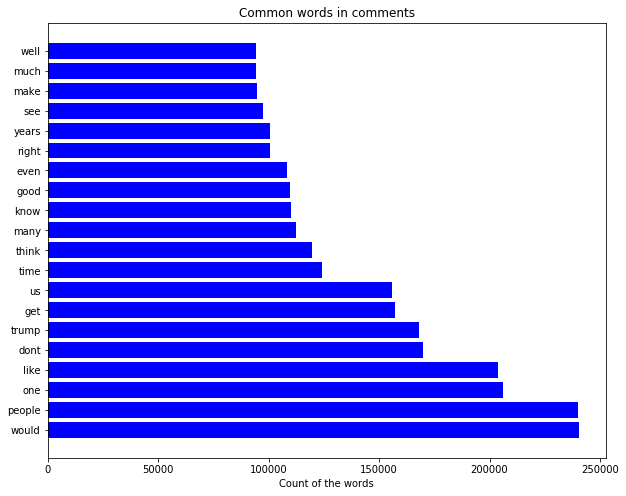

In [38]:
ax = counts_df.sort_values(by="counts", ascending=False).head(20)

plt.figure(figsize=(10, 8))
plt.barh(ax['word'], ax['counts'], color="blue")
plt.title("Common words in comments")
plt.xlabel("Count of the words")
plt.show()

In [39]:
# most common bigrams in comments
cv2 = CountVectorizer(ngram_range=(2, 2), min_df = 0.001, stop_words = stopwords.words('english'))

# counts of words in the corpus ignoring stop words
cv_fit2=cv2.fit_transform(corpus)

# vocab in the tweets
bigrams = cv2.get_feature_names()

# counts of words in the tweets
bigram_counts = cv_fit2.toarray().sum(axis=0)


In [40]:
# dataframe of bigram and its corresponding count
bigrams_counts_df = pd.DataFrame()

bigrams_counts_df['bigram'] = bigrams
bigrams_counts_df['counts'] = bigram_counts

bigrams_counts_df.head()

,bigram,counts
0,10 years,3831
1,15 years,1570
2,20 years,3814
3,25 years,1531
4,30 years,3138


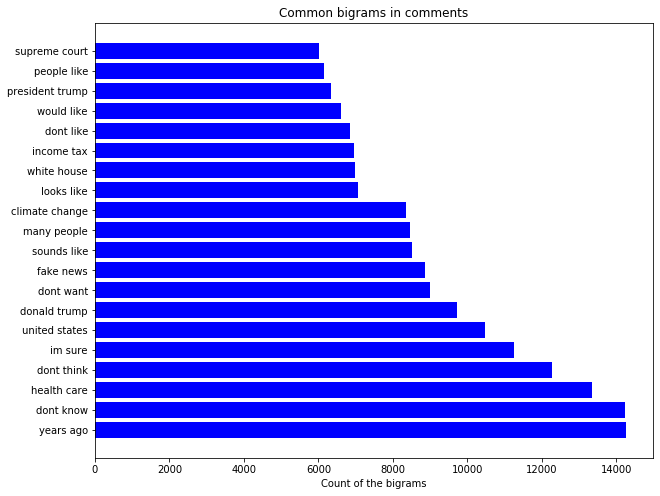

In [41]:
ax = bigrams_counts_df.sort_values(by="counts", ascending=False).head(20)

plt.figure(figsize=(10, 8))
plt.barh(ax['bigram'], ax['counts'], color="blue")
plt.title("Common bigrams in comments")
plt.xlabel("Count of the bigrams")
plt.show()

In [43]:
# append the above 2 lists to their respective dfs
del train_data['comment_text']
del validate_data['comment_text']

train_data['comment_text'] = nostop_train
validate_data['comment_text'] = nostop_validate


In [45]:
# prepare comments for topic modeling

comment_text = train_data['comment_text'].tolist()

In [58]:
# random sample 100k comments from comment_text
import random

sampling = random.choices(comment_text, k=50000)

In [59]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

In [60]:
# helper function for preprocessing comments

def docs_preprocessor(docs):
    tokenizer = RegexpTokenizer(r'\w+')
    for idx in range(len(docs)):
        #docs[idx] = docs[idx].lower()  # Convert to lowercase.
        docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

    # Remove numbers, but not words that contain numbers.
    docs = [[token for token in doc if not token.isdigit()] for doc in docs]
    
    # Remove words that are only one character.
    docs = [[token for token in doc if len(token) > 1] for doc in docs]
    
    # Lemmatize all words in documents.
    lemmatizer = WordNetLemmatizer()
    docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]
  
    return docs

In [61]:
# preprocess random sample from comment_text

docs = docs_preprocessor(sampling)

# compute bigrams and trigrams

from gensim.models import Phrases
bigram = Phrases(docs, min_count=10)
trigram = Phrases(bigram[docs])

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

In [62]:
from gensim import corpora
from gensim.corpora import Dictionary

# Create a dictionary representation of the comments
dictionary = Dictionary(docs)
print('Number of unique words in initital documents:', len(dictionary))

Number of unique words in initital documents: 62672


In [96]:
# vectorize the data
# bag of words model
# dictionary.filter_extremes(no_below=0, no_above=1)


dirichlet_dict = corpora.Dictionary(docs)
corpus = [dictionary.doc2bow(doc) for doc in docs]


In [87]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 62672
Number of documents: 50000


**Determining the optimum number of topics**

In [89]:
# Considering 1-15 topics into consideration
num_topics = list(range(16)[1:])
num_keywords = 15

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token


In [91]:
from gensim.models import LdaModel, CoherenceModel

LDA_models = {}
LDA_topics = {}
for i in num_topics:
    LDA_models[i] = LdaModel(corpus=corpus, id2word=id2word, chunksize=550, \
                       alpha='auto', eta='auto', \
                       iterations=100, num_topics=i, \
                       passes=10, eval_every=1)
                             

    shown_topics = LDA_models[i].show_topics(num_topics=i, 
                                             num_words=num_keywords,
                                             formatted=False)
    LDA_topics[i] = [[word[0] for word in topic[1]] for topic in shown_topics]

In [92]:
# helper function to get jaccard similarity between 2 topics

def jaccard_similarity(topic_1, topic_2):
    """
    Derives the Jaccard similarity of two topics

    Jaccard similarity:
    - A statistic used for comparing the similarity and diversity of sample sets
    - J(A,B) = (A ∩ B)/(A ∪ B)
    - Goal is low Jaccard scores for coverage of the diverse elements
    """
    intersection = set(topic_1).intersection(set(topic_2))
    union = set(topic_1).union(set(topic_2))
                    
    return float(len(intersection))/float(len(union))

In [93]:
# deriving mean stability across topics
LDA_stability = {}
for i in range(0, len(num_topics)-1):
    jaccard_sims = []
    for t1, topic1 in enumerate(LDA_topics[num_topics[i]]): # pylint: disable=unused-variable
        sims = []
        for t2, topic2 in enumerate(LDA_topics[num_topics[i+1]]): # pylint: disable=unused-variable
            sims.append(jaccard_similarity(topic1, topic2))    
        
        jaccard_sims.append(sims)    
    
    LDA_stability[num_topics[i]] = jaccard_sims
                
mean_stabilities = [np.array(LDA_stability[i]).mean() for i in num_topics[:-1]]

In [116]:
# calculate coherence scores for all the LDA models with diff no. of topics
coherences = [CoherenceModel(model=LDA_models[i], corpus=corpus, coherence='u_mass').get_coherence()\
              for i in num_topics[:-1]]

In [109]:
# determining ideal number of topics
coh_sta_diffs = [coherences[i] - mean_stabilities[i] for i in range(num_keywords)[:-1]] # limit topic numbers to the number of keywords
coh_sta_max = max(coh_sta_diffs)
coh_sta_max_idxs = [i for i, j in enumerate(coh_sta_diffs) if j == coh_sta_max]
ideal_topic_num_index = coh_sta_max_idxs[0] # choose less topics in case there's more than one max
ideal_topic_num = num_topics[ideal_topic_num_index]

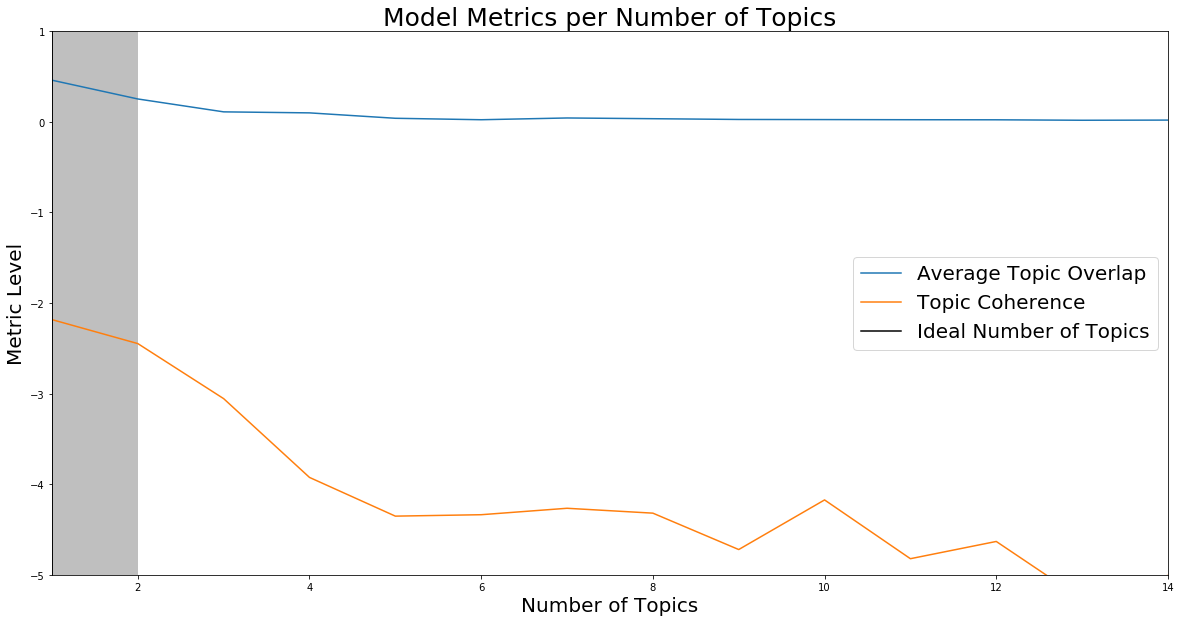

In [120]:
# graph to visualize coherence scores for each no. of topics

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
ax = sns.lineplot(x=num_topics[:-1], y=mean_stabilities, label='Average Topic Overlap')
ax = sns.lineplot(x=num_topics[:-1], y=coherences, label='Topic Coherence')

ax.axvline(x=ideal_topic_num, label='Ideal Number of Topics', color='black')
ax.axvspan(xmin=ideal_topic_num - 1, xmax=ideal_topic_num + 1, alpha=0.5, facecolor='grey')

y_max = max(max(mean_stabilities), max(coherences)) + (0.10 * max(max(mean_stabilities), max(coherences)))
ax.set_ylim([-5, 1])
ax.set_xlim([1, num_topics[-1]-1])
                
ax.axes.set_title('Model Metrics per Number of Topics', fontsize=25)
ax.set_ylabel('Metric Level', fontsize=20)
ax.set_xlabel('Number of Topics', fontsize=20)
plt.legend(fontsize=20)
plt.show()   

**Train LDA model**

In [121]:
from gensim.models import LdaModel

num_topics = 2
chunksize = 550 # size of the doc looked at every pass
passes = 10 # number of passes through documents
iterations = 150
eval_every = 1  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

%time lda_model = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

Wall time: 4min 18s


In [122]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

**Visualize LDA clusters**

In [123]:
pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)

C:\Users\karth\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.162814  0.0       1        1  70.907852
0     -0.162814  0.0       2        1  29.092148, topic_info=    Category         Freq    Term        Total  loglift  logprob
72   Default  3579.000000     tax  3579.000000  30.0000  30.0000
52   Default  2710.000000   money  2710.000000  29.0000  29.0000
265  Default  2265.000000     pay  2265.000000  28.0000  28.0000
221  Default  4991.000000    year  4991.000000  27.0000  27.0000
283  Default  6703.000000   trump  6703.000000  26.0000  26.0000
..       ...          ...     ...          ...      ...      ...
203   Topic2  1085.484375    much  3101.261475   0.1849  -5.8797
475   Topic2  1077.082275    make  4104.204102  -0.1031  -5.8875
51    Topic2  1045.688599    many  3732.195312  -0.0376  -5.9171
59    Topic2  1148.096069  people  8779.793945  -0.7996  -5.8237
135   Topic2  1040.828247     one  7536.563477  -0.7450  -5.9218

[155 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1364      1  0.000885    alaska
1364      2  0.999719    alaska
1032      1  0.999132  american
1032      2  0.001110  american
1591      1  0.985153  anything
...     ...       ...       ...
84        2  0.001615     wrong
221       1  0.413730      year
221       2  0.586235      year
2472      1  0.999091     youre
2472      2  0.000714     youre

[232 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

In [126]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda_model.print_topics()]

topics = [' '.join(t[0:10]) for t in words]

# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
tax year money get pay state would government need business

------ Topic 1 ------
people trump one would like dont u right know get



In [127]:
from gensim.models import LdaModel

num_topics = 10
chunksize = 550 # size of the doc looked at every pass
passes = 10 # number of passes through documents
iterations = 150
eval_every = 1  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

%time lda_model = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

Wall time: 5min 23s


In [128]:
pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)

C:\Users\karth\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.380575 -0.190523       1        1  42.829041
8      0.140765  0.373745       2        1  12.485678
3      0.122538  0.085767       3        1  11.037224
2      0.017374 -0.158068       4        1   8.316924
6     -0.069736 -0.000068       5        1   6.240893
7     -0.085984 -0.056033       6        1   5.907856
4     -0.096026 -0.003143       7        1   5.149526
0     -0.125316 -0.019815       8        1   3.904479
1     -0.141765 -0.016242       9        1   2.185019
5     -0.142425 -0.015619      10        1   1.943367, topic_info=     Category         Freq       Term        Total  loglift  logprob
283   Default  6867.000000      trump  6867.000000  30.0000  30.0000
75    Default  6029.000000          u  6029.000000  29.0000  29.0000
72    Default  3866.000000        tax  3866.000000  28.0000  28.0000
59    Default  9970.000000     people  9970.000000  27.0000  27.0000
392   Default  4033.000000      state  4033.000000  26.0000  26.0000
...       ...          ...        ...          ...      ...      ...
3351  Topic10   155.120544    sitting   156.060715   3.9347  -5.1193
3347  Topic10   155.102982  permanent   156.043091   3.9347  -5.1194
6132  Topic10   144.240936   director   145.181137   3.9343  -5.1920
2167  Topic10   139.990051    leftist   140.930252   3.9341  -5.2219
2357  Topic10   139.363541      fewer   140.303726   3.9340  -5.2264

[355 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2335      8  0.996819    abortion
972       5  0.998127  absolutely
1163      7  0.997514     address
1635     10  0.996442    advocate
731       9  0.992532  affordable
...     ...       ...         ...
221       1  0.993937        year
221       4  0.005909        year
1764      2  0.931744         yet
1764      3  0.067541         yet
7294      9  0.992978        youd

[356 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 9, 4, 3, 7, 8, 5, 1, 2, 6])

In [129]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda_model.print_topics()]

topics = [' '.join(t[0:10]) for t in words]

# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
alaska fund control hawaii coming alaskan sex john funny native

------ Topic 1 ------
god common sexual break global ignore gave heart language limit

------ Topic 2 ------
tax money pay care business cost million system company service

------ Topic 3 ------
law woman comment believe man find read post white must

------ Topic 4 ------
trump president news clinton medium lie hillary russian campaign evidence

------ Topic 5 ------
immigration wage worker sale demand wanted percent park healthcare province

------ Topic 6 ------
city oil using area industry thank ive trade water food

------ Topic 7 ------
vote party republican election conservative political member voter democrat attack

------ Topic 8 ------
u state government country canada world canadian liberal job american

------ Topic 9 ------
people would one like get dont time year need know

